In [1]:
# Imports
import pandas as pd

In [2]:
# Merging clients and dispositions
clients = pd.read_csv("dataset/client.csv", sep=";")

disps = pd.read_csv("dataset/disp.csv", sep=";")

clients_disps = pd.merge(clients, disps, on="client_id")

In [3]:
# Merging clients/dispositions and cards
cards = pd.read_csv("dataset/card_train.csv", sep=";")

clients_disps.rename(columns={"type": "type_disp"}, inplace=True)

cards.rename(columns={"type": "type_card"}, inplace=True)

clients_disps_cards = pd.merge(clients_disps, cards, on="disp_id", how="outer")

In [4]:
# Cleaning district data
districts = pd.read_csv("dataset/district.csv", sep=";")
# Renaming code to district_id
districts.rename(columns={"code ": "district_id"}, inplace=True)
# Removing name and region
districts.drop(['name ','region'], axis=1, inplace=True)

In [5]:
# Merging districts
clients_disps_cards_districts = pd.merge(clients_disps_cards, districts, on="district_id")

clients_disps_cards_districts.drop(['district_id'], inplace=True, axis=1)

In [6]:
# Merging accounts
accounts = pd.read_csv("dataset/account.csv", sep=";")
clients_disps_cards_districts_accounts = pd.merge(clients_disps_cards_districts, accounts, on="account_id")
clients_disps_cards_districts_accounts

,client_id,birth_number,disp_id,account_id,type_disp,card_id,type_card,issued,no. of inhabitants,no. of municipalities with inhabitants < 499,...,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96,district_id,frequency,date
0,1,706213,1,1,OWNER,NaN,NaN,NaN,70699,60,...,65.3,8968,2.83,3.35,131,1740,1910,18,monthly issuance,950324
1,420,780313,420,343,OWNER,NaN,NaN,NaN,70699,60,...,65.3,8968,2.83,3.35,131,1740,1910,18,monthly issuance,940426
2,499,355708,499,413,OWNER,NaN,NaN,NaN,70699,60,...,65.3,8968,2.83,3.35,131,1740,1910,18,monthly issuance,960709
3,519,800413,519,431,OWNER,NaN,NaN,NaN,70699,60,...,65.3,8968,2.83,3.35,131,1740,1910,18,monthly issuance,961105
4,682,791021,682,568,OWNER,NaN,NaN,NaN,70699,60,...,65.3,8968,2.83,3.35,131,1740,1910,18,monthly issuance,950328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,9930,720623,9622,8039,OWNER,NaN,NaN,NaN,81344,61,...,55.3,8899,3.39,3.97,149,2987,2487,9,monthly issuance,951217
5365,10070,740423,9762,8153,OWNER,NaN,NaN,NaN,81344,61,...,55.3,8899,3.39,3.97,149,2987,2487,9,monthly issuance,970702
5366,11266,380925,10958,9153,OWNER,NaN,NaN,NaN,81344,61,...,55.3,8899,3.39,3.97,149,2987,2487,9,monthly issuance,961212
5367,11267,365826,10959,9153,DISPONENT,NaN,NaN,NaN,81344,61,...,55.3,8899,3.39,3.97,149,2987,2487,9,monthly issuance,961212


In [7]:
# Normalizing dates and adding sex

dates = clients_disps_cards_districts_accounts["birth_number"]
dates = [str(date)[:2] + "-" + str(date)[2:4] + "-" + str(date)[4:] for date in dates]

new_dates = []
sex = []
for date in dates:
    month = int(date[3:5])
    gender = ""
    if month > 12:
        month = month - 50
        gender = "female"
    else:
        gender = "male"
    if month < 10:
        month = "0" + str(month)
    else:
        month = str(month)
    new_dates.append(date[0:2] + "-" + month + "-" + date[6:8])
    sex.append(gender)
    
ages = []
for date in new_dates:
    year = int("19" + date[0:2])
    age = 2021 - year
    ages.append(age)
    
#date_sex = {"age": ages, "sex": sex}
#date_sex_df = pd.DataFrame(date_sex)

clients_disps_cards_districts_accounts = clients_disps_cards_districts_accounts.drop(["birth_number"], axis=1)

people_account_data = clients_disps_cards_districts_accounts.assign(sex = sex, age = ages)


In [8]:
# Merging the rest?

transaction = pd.read_csv("dataset/trans_train.csv", sep=";")

account_loan_trans = pd.merge(people_account_data, transaction, on="account_id")

loan = pd.read_csv("dataset/loan_train.csv", sep=";")

account_loan_data = pd.merge(account_loan_trans, loan, on="account_id", how="outer")




/home/mechjm/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
# Dropping ids
no_ids = account_loan_data.drop(["client_id", "district_id", "trans_id", "disp_id", "card_id", "account_id", "loan_id"], axis=1)

1 Dropped columns: ["no. of commited crimes '96 "]


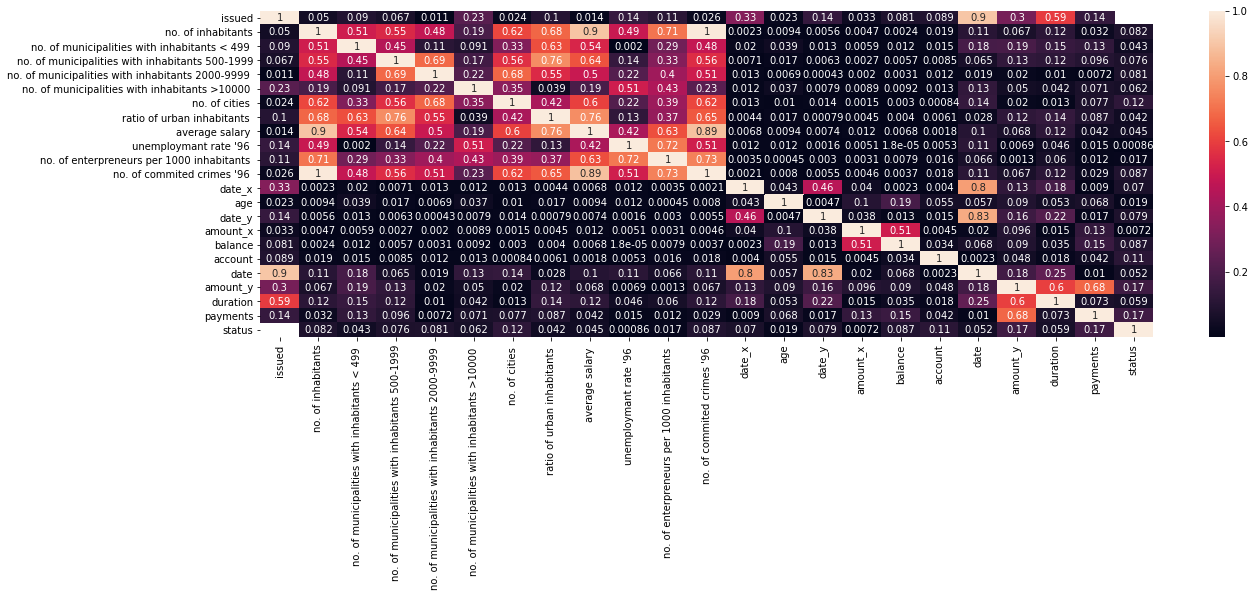

In [10]:
# Removing related columns
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix,annot=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
no_ids.drop(to_drop, axis=1, inplace=True)

print("{} Dropped columns: {}".format(len(to_drop), to_drop) )


In [13]:
# Removing rows with nan values for status
no_ids.dropna(subset=["status"], inplace=True)
#print(no_ids.drop_duplicates(inplace=True)
print(no_ids["status"].value_counts())

 1.0    27403
-1.0     2970
Name: status, dtype: int64


In [16]:
# Removing labels and creating another dataset for them
all_inputs = no_ids.iloc[:, :-1].values
all_labels = no_ids.iloc[:, -1].values

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
print(no_ids)
#dt_classifier = DecisionTreeClassifier(random_state=0)
#dt_grid_search = GridSearchCV(dt_classifier, scoring="roc_auc", cv=10, param_grid={})
#dt_grid_search.fit(all_inputs, all_labels)
#print('Best score: {}'.format(dt_grid_search.best_score_))


       type_disp type_card  issued  no. of inhabitants  \
4764       OWNER       NaN     NaN               70699   
4765       OWNER       NaN     NaN               70699   
4766       OWNER       NaN     NaN               70699   
4767       OWNER       NaN     NaN               70699   
4768       OWNER       NaN     NaN               70699   
...          ...       ...     ...                 ...   
474633     OWNER       NaN     NaN               81344   
474634     OWNER       NaN     NaN               81344   
474635     OWNER       NaN     NaN               81344   
474636     OWNER       NaN     NaN               81344   
474637     OWNER       NaN     NaN               81344   

        no. of municipalities with inhabitants < 499   \
4764                                               60   
4765                                               60   
4766                                               60   
4767                                               60   
4768              